In [ ]:
!pip install causalgraphicalmodels
!sed -i 's/collections/collections.abc/g' /usr/local/lib/python3.10/dist-packages/causalgraphicalmodels/cgm.py
from causalgraphicalmodels import CausalGraphicalModel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## EXERCISE 1

Create the following causal network to verify that the red path is indeed a backdor path using the Causal Graphical Models library

<img src='https://drive.google.com/uc?id=18HUhYGI9Bd2eR87jW_1AdQyCZZBOtBfD'>

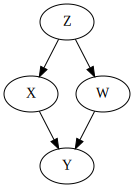

In [ ]:
es1=CausalGraphicalModel(
    nodes=['Z','W','X','Y'],
    edges=[
        ('Z','W'),
        ('Z','X'),
        ('X','Y'),
        ('W','Y')
    ]
)

es1.draw()

In [ ]:
es1.get_all_backdoor_paths('X','Y')

[['X', 'Z', 'W', 'Y']]

## EXERCISE 2

Create the following causal network using the Causal Graphical Models library and find out all the possible sets that satisfy the backdoor criterion.

<img src='https://drive.google.com/uc?id=1rY42DmXV7TpRm7rt5N7m78w30VmyvotC'>



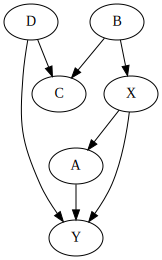

In [ ]:
es2=CausalGraphicalModel(
    nodes=['A','X','Y','B','C','D'],
    edges=[
        ('X','Y'),
        ('X','A'),
        ('A','Y'),
        ('D','Y'),
        ('D','C'),
        ('B','C'),
        ('B','X')
    ]
)

es2.draw()

In [ ]:
es2.get_all_backdoor_adjustment_sets('X','Y')

frozenset({frozenset(),
           frozenset({'B'}),
           frozenset({'D'}),
           frozenset({'B', 'D'}),
           frozenset({'C', 'D'}),
           frozenset({'B', 'C'}),
           frozenset({'B', 'C', 'D'})})

## EXERCISE 3

Create the following causal network using the Causal Graphical Models library and find out all the valid sets for applying the front-door criterion.

<img src='https://drive.google.com/uc?id=1Z6YiKMDVKPLFM5luY_pT78ovSpWH-Ibd'>


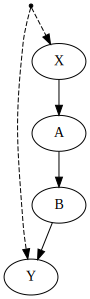

In [ ]:
es3=CausalGraphicalModel(
    nodes=['X','A','B','Y'],
    edges=[
        ('X','A'),
        ('A','B'),
        ('B','Y')
    ],
    latent_edges=[('X','Y')]
)

es3.draw()

In [ ]:
es3.get_all_frontdoor_adjustment_sets('X','Y')

frozenset({frozenset({'B'}), frozenset({'A'}), frozenset({'A', 'B'})})

## EXERCISE 4

Create the following causal network using the Causal Graphical Models library and find out all the valid sets for applying the front-door criterion.

<img src='https://drive.google.com/uc?id=1lK3HZktVYCsJrDzZYEB0uQhL-DxWACcP'>

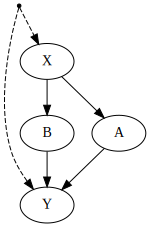

In [ ]:
es4=CausalGraphicalModel(
    nodes=['X','A','B','Y'],
    edges=[
        ('X','A'),
        ('X','B'),
        ('B','Y'),
        ('A','Y')
    ],
    latent_edges=[('X','Y')]
)

es4.draw()

In [ ]:
es4.get_all_frontdoor_adjustment_sets('X','Y')

frozenset({frozenset({'A', 'B'})})

## EXERCISE 5

Consider again the smoking example, for which we have the following data from an hypothetical experiment with 400 smokers and 400 non-smokers:

<img src='https://drive.google.com/uc?id=1RvqtRMF4auVECmSniLFm5yOCq3ykmT-0'>

Write a Python program implementing the front-door adjustment and compute the causal effect of smoking on lung cancer is $P(y | do(x))$.

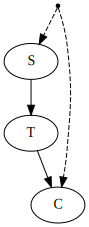

In [ ]:
smoking=CausalGraphicalModel(
    nodes=['S','T','C'],
    edges=[
        ('S','T'),
        ('T','C')
    ],
    latent_edges=[
        ('S','C')
    ]
)

smoking.draw()

In [ ]:
print(smoking.get_all_frontdoor_adjustment_sets('S','C'))
print(smoking.get_all_backdoor_paths('S','T'))
print(smoking.get_all_backdoor_adjustment_sets('S','T'))

frozenset({frozenset({'T'})})
[['S', 'Unobserved_0', 'C', 'T']]
frozenset({frozenset()})


In [ ]:
import numpy as np

PS=np.array([0.5,0.5])

PT_S=np.array([[0.95,0.05],[0.05,0.95]])

PC_TS=np.array([[[0.15,0.95],[0.1,0.9]],[[0.85,0.05],[0.9,0.1]]])

PC_T=PC_TS[:,:,0]*PS[0]+PC_TS[:,:,1]*PS[1]
print(PC_T)
PC_doS=PT_S[0,0]*PC_T[:,0]+PT_S[1,0]*PC_T[:,1]
print(PC_doS)

[[0.55 0.5 ]
 [0.45 0.5 ]]
[0.5475 0.4525]
